In [ ]:
datasetlink[http://www.cis.fordham.edu/wisdm/dataset.php]

In [47]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
# pd.read_csv('WISDM_ar_v1.1_raw.txt')

In [50]:
file = open('WISDM_ar_v1.1_raw.txt')
lines = file.readlines()
procesed_list = []
for i,line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last=='':
            break;
        temp = [line[0],line[1],line[2],line[3],line[4],last]
        procesed_list.append(temp)
    except:
        print('Error at line number :',i)

Error at line number : 281873
Error at line number : 281874
Error at line number : 281875


In [51]:
# procesed_list

In [52]:
columns = ['user','activity','time','x','y','z']

In [53]:
data = pd.DataFrame(data=procesed_list,columns=columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [54]:
data.shape

(343416, 6)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [56]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [57]:
data.activity.value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

# Balanced this data

In [58]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [60]:
Fs = 20

In [61]:
activities = data.activity.value_counts().index

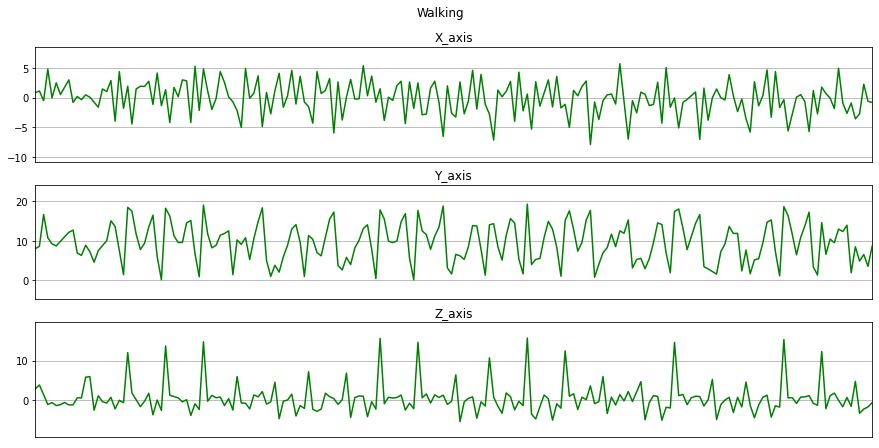

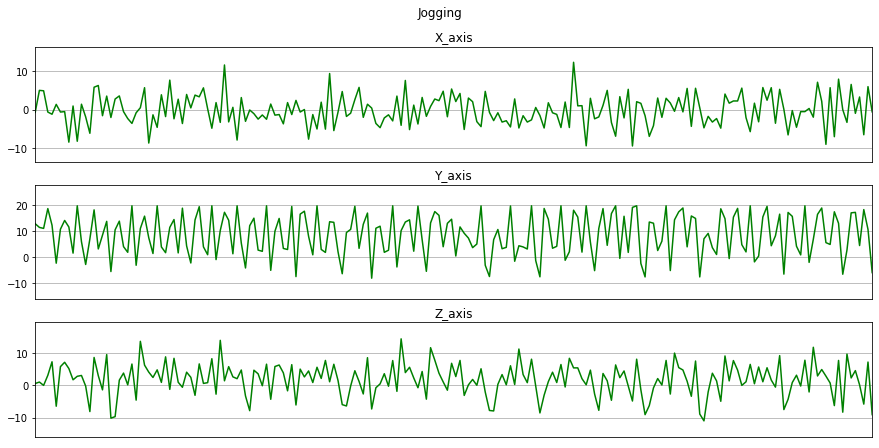

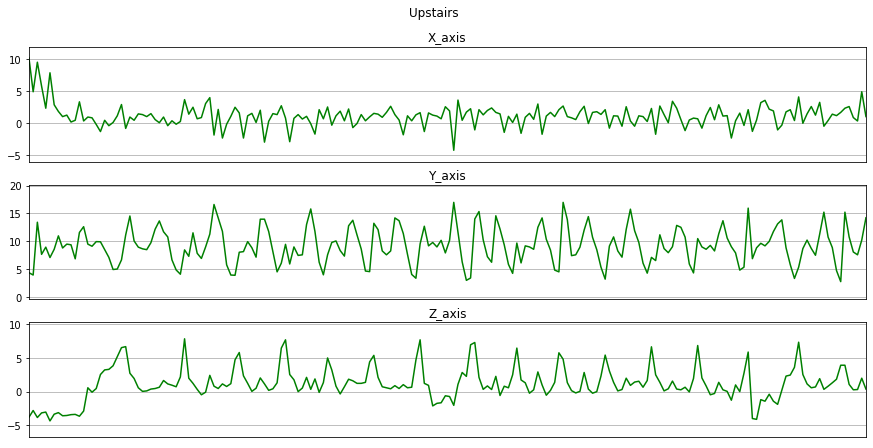

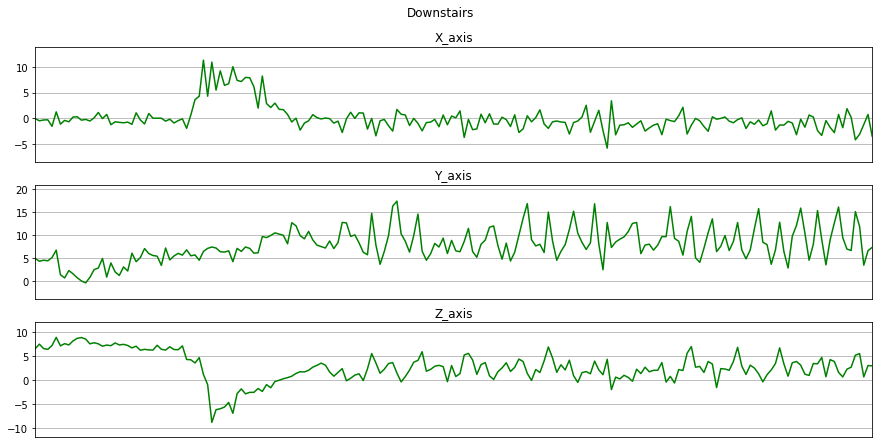

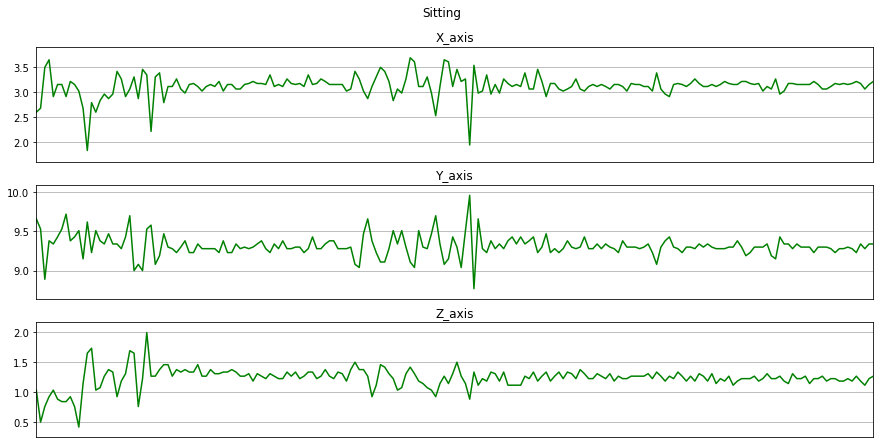

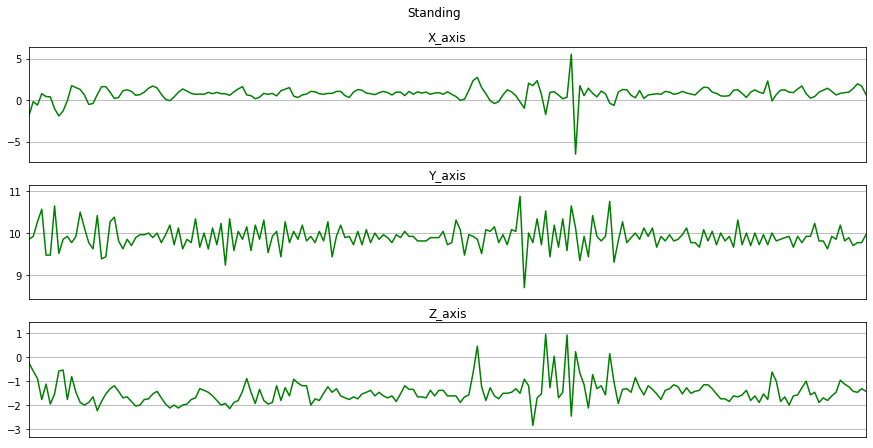

In [62]:
def plot_activity(activity,data):
    fig,(ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(15,7),sharex=True)
    plot_axis(ax0,data['time'],data['x'],'X_axis')
    plot_axis(ax1,data['time'],data['y'],'Y_axis')    
    plot_axis(ax2,data['time'],data['z'],'Z_axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
def plot_axis(ax,x,y,title):
    ax.plot(x,y,'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    ax.set_xlim([min(x),max(x)])
    ax.grid(True)
    
for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity,data_for_plot)

In [63]:
df = data.drop(['user','time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [64]:
df.activity.value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [65]:
Walking = df[df['activity']=='Walking'].head(3555).copy() 
Jogging = df[df['activity']=='Jogging'].head(3555).copy() 
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy() 
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy() 
Sitting = df[df['activity']=='Sitting'].head(3555).copy() 
Standing = df[df['activity']=='Standing'].copy() 

In [66]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])
balanced_data.shape

(21330, 4)

In [67]:
balanced_data.activity.value_counts()

Standing      3555
Downstairs    3555
Jogging       3555
Sitting       3555
Walking       3555
Upstairs      3555
Name: activity, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [70]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [71]:
#Standerdized data

In [72]:
X = balanced_data[['x','y','z']]
y = balanced_data['label']

In [73]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data=X,columns=['x','y','z'])
scaled_X['label'] = y.values
scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


# # Frame prepration

In [74]:
import scipy.stats as stats

In [75]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2

In [76]:
def get_frame(df,frame_size,hop_size):
    N_FEATURES = 3
    
    frames = []
    labels = []
    for i in range(0,len(df)-frame_size,hop_size):
        x = df['x'].values[i:i+frame_size]
        y = df['y'].values[i:i+frame_size]
        z = df['z'].values[i:i+frame_size]
        
        #Retrive the most often use label in this segment
        label = stats.mode(df['label'][i:i+frame_size])[0][0]
        frames.append([x,y,z])
        labels.append(label)
        
    # Bring the segment in better shape
    frames = np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
    labels = np.asarray(labels)
    
    return frames,labels

In [77]:
X,y = get_frame(scaled_X,frame_size,hop_size)

In [78]:
X.shape,y.shape

((532, 80, 3), (532,))

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [80]:
X_train.shape,X_test.shape

((425, 80, 3), (107, 80, 3))

In [81]:
X_train = X_train.reshape(425,80,3,1)
X_test = X_test.reshape(107,80,3,1)
X_train.shape,X_test.shape

((425, 80, 3, 1), (107, 80, 3, 1))

# 2D CNN Mo0del

In [82]:
model = Sequential()
model.add(Conv2D(16,(2,2),activation='relu',input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

In [83]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [84]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
14/14 [==============================] - 0s 17ms/step - loss: 1.6627 - accuracy: 0.2729 - val_loss: 1.4177 - val_accuracy: 0.3551
Epoch 2/10
14/14 [==============================] - 0s 11ms/step - loss: 1.3500 - accuracy: 0.4424 - val_loss: 1.0792 - val_accuracy: 0.6075
Epoch 3/10
14/14 [==============================] - 0s 11ms/step - loss: 1.0510 - accuracy: 0.6424 - val_loss: 0.7725 - val_accuracy: 0.7850
Epoch 4/10
14/14 [==============================] - 0s 11ms/step - loss: 0.7736 - accuracy: 0.7271 - val_loss: 0.6044 - val_accuracy: 0.7850
Epoch 5/10
14/14 [==============================] - 0s 11ms/step - loss: 0.6361 - accuracy: 0.7788 - val_loss: 0.4556 - val_accuracy: 0.8598
Epoch 6/10
14/14 [==============================] - 0s 11ms/step - loss: 0.4708 - accuracy: 0.8541 - val_loss: 0.3646 - val_accuracy: 0.9065
Epoch 7/10
14/14 [==============================] - 0s 11ms/step - loss: 0.3852 - accuracy: 0.8682 - val_loss: 0.3801 - val_accuracy: 0.8318
Epoch 8/10
14

In [85]:
def plot_learningcurve(history,epoch):
  #plot training and validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()
  
  # plot training and validation Loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

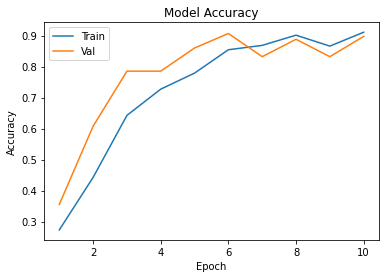

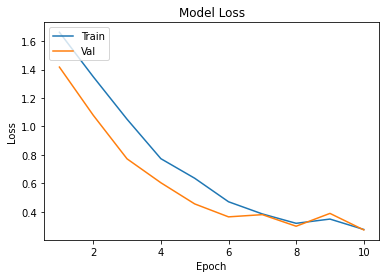

In [86]:
plot_learningcurve(history,10)

In [87]:
## Confusion Metrics

In [88]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [89]:
y_pred = model.predict_classes(X_test)

In [93]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0,  0,  8,  0],
       [ 0, 17,  0,  0,  0,  1],
       [ 0,  0, 21,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0],
       [ 1,  1,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 15]])

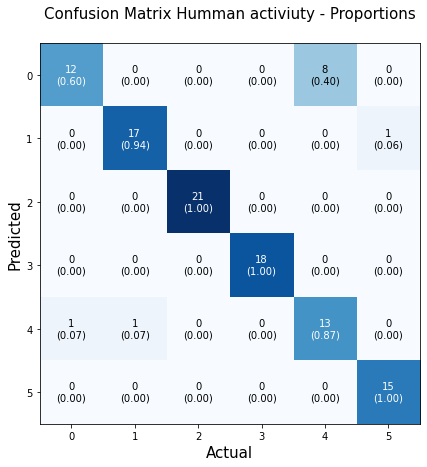

In [97]:
%matplotlib inline
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True,figsize=(7,7))
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(labels, fontsize=13)
ax.set_yticklabels(labels, fontsize=13)
plt.title("Confusion Matrix Humman activiuty - Proportions", fontsize=15)
plt.savefig('HAresult.png')

In [94]:
labels = list(label.classes_)

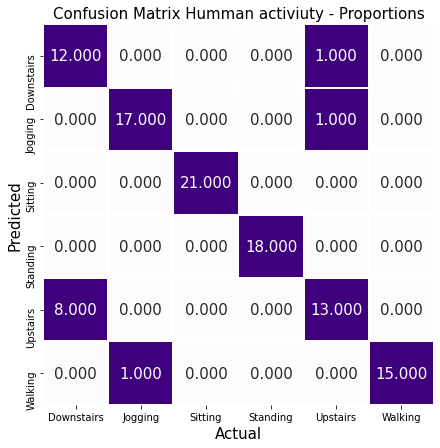

In [98]:
mat = confusion_matrix(y_test,y_pred)
df = pd.DataFrame(mat)
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(pd.DataFrame(df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=1, fmt='.3f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=labels, yticklabels=labels)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
plt.title("Confusion Matrix Humman activiuty - Proportions", fontsize=15)
plt.savefig('Hresult.png')

In [ ]:
plt.hea